In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import sklearn


%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing the dataset
df = pd.read_csv("H2HBABBA1395.csv")

In [3]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR llc,2019-04-23 00:00:00,2019.0,1.929137e+09,2019-04-12,20190412,20190412,20190427.0,USD,RV,1.0,NaN,7497.67,20190412.0,NAH4,1.929137e+09,0
1,U001,0200416837,DEC systems,2019-03-08 00:00:00,2019.0,1.928929e+09,2019-03-08,20190308,20190308,20190308.0,USD,RV,1.0,NaN,7460.59,20190301.0,NAM1,1.928929e+09,0
2,U001,0200974851,RESTA trust,2019-03-20 00:00:00,2019.0,1.928883e+09,2019-02-28,20190301,20190228,20190320.0,USD,RV,1.0,NaN,94.03,20190228.0,NAD1,1.928883e+09,0
3,U001,0200785971,SYSCO us,2019-09-03 00:00:00,2019.0,1.929766e+09,2019-08-20,20190820,20190820,20190904.0,USD,RV,1.0,NaN,20469.40,20190820.0,NAA8,1.929766e+09,0
4,U001,0200275115,SHAWS llc,NaN,2020.0,1.930798e+09,2020-04-17,20200417,20200417,20200502.0,USD,RV,1.0,NaN,147954.89,20200417.0,NAA8,1.930798e+09,1


# DATA PREPROCESSING

In [4]:
#checking for null values
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    3
isOpen                        0
dtype: int64

In [5]:
#area buisness have 50,000 null values so dropping the coloum
df.drop('area_business',axis=1,inplace=True)
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR llc,2019-04-23 00:00:00,2019.0,1.929137e+09,2019-04-12,20190412,20190412,20190427.0,USD,RV,1.0,7497.67,20190412.0,NAH4,1.929137e+09,0
1,U001,0200416837,DEC systems,2019-03-08 00:00:00,2019.0,1.928929e+09,2019-03-08,20190308,20190308,20190308.0,USD,RV,1.0,7460.59,20190301.0,NAM1,1.928929e+09,0
2,U001,0200974851,RESTA trust,2019-03-20 00:00:00,2019.0,1.928883e+09,2019-02-28,20190301,20190228,20190320.0,USD,RV,1.0,94.03,20190228.0,NAD1,1.928883e+09,0
3,U001,0200785971,SYSCO us,2019-09-03 00:00:00,2019.0,1.929766e+09,2019-08-20,20190820,20190820,20190904.0,USD,RV,1.0,20469.40,20190820.0,NAA8,1.929766e+09,0
4,U001,0200275115,SHAWS llc,NaN,2020.0,1.930798e+09,2020-04-17,20200417,20200417,20200502.0,USD,RV,1.0,147954.89,20200417.0,NAA8,1.930798e+09,1


In [6]:
#checking for any duplicate coloumn
def getmeduplicates(dt):
    duplicateColumns=set()
    for x in range(dt.shape[1]):
        col1=dt.iloc[:,x]
        for y in range(x+1,dt.shape[1]):
            col2=dt.iloc[:,y]
            if col1.equals(col2):
                duplicateColumns.add(dt.columns.values[y])
    return list(duplicateColumns)
duplicates =getmeduplicates(df)
print(len(duplicates))
df.drop(duplicates,axis=1,inplace=True)
df.shape

0


(50000, 18)

In [7]:
# no duplicates coloumns

In [8]:
#checking for the duplicates in the row

In [9]:
df.loc[df.duplicated(), :]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
545,U001,0200779906,BOZZU foundation,2019-12-16 00:00:00,2019.0,1.930174e+09,2019-11-29,20191120,20191129,20191214.0,USD,RV,1.0,2366.04,20191129.0,NAA8,1.930174e+09,0
2166,U001,0200326954,NEWE llc,2020-02-03 00:00:00,2020.0,1.930463e+09,2020-01-31,20200131,20200131,20200207.0,USD,RV,1.0,66108.00,20200131.0,NAD8,1.930463e+09,0
2562,U001,0200769623,WAL-MAR corporation,2019-11-19 00:00:00,2019.0,1.930130e+09,2019-11-09,20191108,20191109,20191124.0,USD,RV,1.0,47709.84,20191109.0,NAH4,1.930130e+09,0
2652,U001,0200782001,GORDO systems,2019-04-16 00:00:00,2019.0,1.929078e+09,2019-04-03,20190403,20190403,20190418.0,USD,RV,1.0,39358.13,20190403.0,NAA8,1.929078e+09,0
2670,U001,CCU013,KRAFT F llc,2019-11-01 00:00:00,2019.0,1.929927e+09,2019-09-27,20190925,20190927,20190927.0,USD,RV,1.0,10488.80,20190927.0,NAX2,1.929927e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49887,U001,0200472708,WEST P trust,2019-07-25 00:00:00,2019.0,1.929609e+09,2019-07-11,20190711,20190711,20190721.0,USD,RV,1.0,19160.01,20190711.0,NA10,1.929609e+09,0
49913,U001,0200794332,COST trust,2019-08-07 00:00:00,2019.0,1.929646e+09,2019-07-23,20190722,20190723,20190807.0,USD,RV,1.0,48290.67,20190723.0,NAAX,1.929646e+09,0
49933,U001,0200729942,SA co,2019-08-13 00:00:00,2019.0,1.929686e+09,2019-08-02,20190801,20190802,20190817.0,USD,RV,1.0,16360.32,20190802.0,NAA8,1.929686e+09,0
49977,U001,0200769623,WAL-MAR,NaN,2020.0,1.930646e+09,2020-03-19,20200312,20200319,20200403.0,USD,RV,1.0,1824.97,20200319.0,NAH4,1.930646e+09,1


In [10]:
df=df.drop_duplicates(keep='first')
df.shape

(48816, 18)

In [11]:
#invoice_id and doc_id seems to same :)
df['invoice_id'].equals(df['doc_id'])

False

In [12]:
df[df.doc_id!=df.invoice_id]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
19177,CA02,0140104409,LOB in,2019-12-27 00:00:00,2019.0,9.500000e+09,2019-04-30,20190430,20190408,20190418.0,CAD,X2,1.0,454.44,20190408.0,CA10,NaN,0
44968,CA02,0140104223,H Y LO llc,2019-05-08 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190320,20190330.0,CAD,X2,1.0,73785.00,20190320.0,CA10,NaN,0
46755,CA02,0140104409,LOB associates,2019-05-31 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190131,20190210.0,CAD,X2,1.0,20472.48,20190131.0,CA10,NaN,0


In [13]:
df = df[df.invoice_id.notnull()]

In [14]:
df.shape

(48813, 18)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48813 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           48813 non-null  object 
 1   cust_number             48813 non-null  object 
 2   name_customer           48813 non-null  object 
 3   clear_date              39098 non-null  object 
 4   buisness_year           48813 non-null  float64
 5   doc_id                  48813 non-null  float64
 6   posting_date            48813 non-null  object 
 7   document_create_date    48813 non-null  int64  
 8   document_create_date.1  48813 non-null  int64  
 9   due_in_date             48813 non-null  float64
 10  invoice_currency        48813 non-null  object 
 11  document type           48813 non-null  object 
 12  posting_id              48813 non-null  float64
 13  total_open_amount       48813 non-null  float64
 14  baseline_create_date    48813 non-null

In [16]:
import datetime

In [17]:
df['clear_date']=pd.to_datetime(df['clear_date'])
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR llc,2019-04-23,2019.0,1.929137e+09,2019-04-12,20190412,20190412,20190427.0,USD,RV,1.0,7497.67,20190412.0,NAH4,1.929137e+09,0
1,U001,0200416837,DEC systems,2019-03-08,2019.0,1.928929e+09,2019-03-08,20190308,20190308,20190308.0,USD,RV,1.0,7460.59,20190301.0,NAM1,1.928929e+09,0
2,U001,0200974851,RESTA trust,2019-03-20,2019.0,1.928883e+09,2019-02-28,20190301,20190228,20190320.0,USD,RV,1.0,94.03,20190228.0,NAD1,1.928883e+09,0
3,U001,0200785971,SYSCO us,2019-09-03,2019.0,1.929766e+09,2019-08-20,20190820,20190820,20190904.0,USD,RV,1.0,20469.40,20190820.0,NAA8,1.929766e+09,0
4,U001,0200275115,SHAWS llc,NaT,2020.0,1.930798e+09,2020-04-17,20200417,20200417,20200502.0,USD,RV,1.0,147954.89,20200417.0,NAA8,1.930798e+09,1


In [18]:
df["due_in_date"]=df["due_in_date"].astype(int)

In [19]:
df['due_in_date']=pd.to_datetime(df['due_in_date'],format='%Y%m%d')
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR llc,2019-04-23,2019.0,1.929137e+09,2019-04-12,20190412,20190412,2019-04-27,USD,RV,1.0,7497.67,20190412.0,NAH4,1.929137e+09,0
1,U001,0200416837,DEC systems,2019-03-08,2019.0,1.928929e+09,2019-03-08,20190308,20190308,2019-03-08,USD,RV,1.0,7460.59,20190301.0,NAM1,1.928929e+09,0
2,U001,0200974851,RESTA trust,2019-03-20,2019.0,1.928883e+09,2019-02-28,20190301,20190228,2019-03-20,USD,RV,1.0,94.03,20190228.0,NAD1,1.928883e+09,0
3,U001,0200785971,SYSCO us,2019-09-03,2019.0,1.929766e+09,2019-08-20,20190820,20190820,2019-09-04,USD,RV,1.0,20469.40,20190820.0,NAA8,1.929766e+09,0
4,U001,0200275115,SHAWS llc,NaT,2020.0,1.930798e+09,2020-04-17,20200417,20200417,2020-05-02,USD,RV,1.0,147954.89,20200417.0,NAA8,1.930798e+09,1


In [20]:
#In this dataset Target coloumn is delay date daelay = cleardate-duein date
df["delay_date"]=df['clear_date'].dt.dayofyear - df['due_in_date'].dt.dayofyear

In [21]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay_date
0,U001,200769623,WAL-MAR llc,2019-04-23,2019.0,1.929137e+09,2019-04-12,20190412,20190412,2019-04-27,USD,RV,1.0,7497.67,20190412.0,NAH4,1.929137e+09,0,-4.0
1,U001,0200416837,DEC systems,2019-03-08,2019.0,1.928929e+09,2019-03-08,20190308,20190308,2019-03-08,USD,RV,1.0,7460.59,20190301.0,NAM1,1.928929e+09,0,0.0
2,U001,0200974851,RESTA trust,2019-03-20,2019.0,1.928883e+09,2019-02-28,20190301,20190228,2019-03-20,USD,RV,1.0,94.03,20190228.0,NAD1,1.928883e+09,0,0.0
3,U001,0200785971,SYSCO us,2019-09-03,2019.0,1.929766e+09,2019-08-20,20190820,20190820,2019-09-04,USD,RV,1.0,20469.40,20190820.0,NAA8,1.929766e+09,0,-1.0
4,U001,0200275115,SHAWS llc,NaT,2020.0,1.930798e+09,2020-04-17,20200417,20200417,2020-05-02,USD,RV,1.0,147954.89,20200417.0,NAA8,1.930798e+09,1,NaN


In [22]:
df.drop('document_create_date.1',axis=1,inplace=True)

In [23]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay_date
0,U001,200769623,WAL-MAR llc,2019-04-23,2019.0,1.929137e+09,2019-04-12,20190412,2019-04-27,USD,RV,1.0,7497.67,20190412.0,NAH4,1.929137e+09,0,-4.0
1,U001,0200416837,DEC systems,2019-03-08,2019.0,1.928929e+09,2019-03-08,20190308,2019-03-08,USD,RV,1.0,7460.59,20190301.0,NAM1,1.928929e+09,0,0.0
2,U001,0200974851,RESTA trust,2019-03-20,2019.0,1.928883e+09,2019-02-28,20190301,2019-03-20,USD,RV,1.0,94.03,20190228.0,NAD1,1.928883e+09,0,0.0
3,U001,0200785971,SYSCO us,2019-09-03,2019.0,1.929766e+09,2019-08-20,20190820,2019-09-04,USD,RV,1.0,20469.40,20190820.0,NAA8,1.929766e+09,0,-1.0
4,U001,0200275115,SHAWS llc,NaT,2020.0,1.930798e+09,2020-04-17,20200417,2020-05-02,USD,RV,1.0,147954.89,20200417.0,NAA8,1.930798e+09,1,NaN


In [24]:
#constant removal
df.nunique()

business_code               6
cust_number              1393
name_customer            4185
clear_date                398
buisness_year               2
doc_id                  48813
posting_date              501
document_create_date      505
due_in_date               548
invoice_currency            2
document type               1
posting_id                  1
total_open_amount       44265
baseline_create_date      504
cust_payment_terms         74
invoice_id              48813
isOpen                      2
delay_date                195
dtype: int64

In [25]:
#document type and #posting id is constatnt
df.drop(['document type','posting_id'],axis=1,inplace=True)

In [26]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay_date
0,U001,200769623,WAL-MAR llc,2019-04-23,2019.0,1.929137e+09,2019-04-12,20190412,2019-04-27,USD,7497.67,20190412.0,NAH4,1.929137e+09,0,-4.0
1,U001,0200416837,DEC systems,2019-03-08,2019.0,1.928929e+09,2019-03-08,20190308,2019-03-08,USD,7460.59,20190301.0,NAM1,1.928929e+09,0,0.0
2,U001,0200974851,RESTA trust,2019-03-20,2019.0,1.928883e+09,2019-02-28,20190301,2019-03-20,USD,94.03,20190228.0,NAD1,1.928883e+09,0,0.0
3,U001,0200785971,SYSCO us,2019-09-03,2019.0,1.929766e+09,2019-08-20,20190820,2019-09-04,USD,20469.40,20190820.0,NAA8,1.929766e+09,0,-1.0
4,U001,0200275115,SHAWS llc,NaT,2020.0,1.930798e+09,2020-04-17,20200417,2020-05-02,USD,147954.89,20200417.0,NAA8,1.930798e+09,1,NaN


In [27]:
df["buisness_year"]=df["buisness_year"].astype(int)
df.head()


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay_date
0,U001,200769623,WAL-MAR llc,2019-04-23,2019,1.929137e+09,2019-04-12,20190412,2019-04-27,USD,7497.67,20190412.0,NAH4,1.929137e+09,0,-4.0
1,U001,0200416837,DEC systems,2019-03-08,2019,1.928929e+09,2019-03-08,20190308,2019-03-08,USD,7460.59,20190301.0,NAM1,1.928929e+09,0,0.0
2,U001,0200974851,RESTA trust,2019-03-20,2019,1.928883e+09,2019-02-28,20190301,2019-03-20,USD,94.03,20190228.0,NAD1,1.928883e+09,0,0.0
3,U001,0200785971,SYSCO us,2019-09-03,2019,1.929766e+09,2019-08-20,20190820,2019-09-04,USD,20469.40,20190820.0,NAA8,1.929766e+09,0,-1.0
4,U001,0200275115,SHAWS llc,NaT,2020,1.930798e+09,2020-04-17,20200417,2020-05-02,USD,147954.89,20200417.0,NAA8,1.930798e+09,1,NaN


In [28]:
df["document_create_date"]=df["document_create_date"].astype(int)
df['document_create_date']=pd.to_datetime(df['document_create_date'],format='%Y%m%d')


In [29]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay_date
0,U001,200769623,WAL-MAR llc,2019-04-23,2019,1.929137e+09,2019-04-12,2019-04-12,2019-04-27,USD,7497.67,20190412.0,NAH4,1.929137e+09,0,-4.0
1,U001,0200416837,DEC systems,2019-03-08,2019,1.928929e+09,2019-03-08,2019-03-08,2019-03-08,USD,7460.59,20190301.0,NAM1,1.928929e+09,0,0.0
2,U001,0200974851,RESTA trust,2019-03-20,2019,1.928883e+09,2019-02-28,2019-03-01,2019-03-20,USD,94.03,20190228.0,NAD1,1.928883e+09,0,0.0
3,U001,0200785971,SYSCO us,2019-09-03,2019,1.929766e+09,2019-08-20,2019-08-20,2019-09-04,USD,20469.40,20190820.0,NAA8,1.929766e+09,0,-1.0
4,U001,0200275115,SHAWS llc,NaT,2020,1.930798e+09,2020-04-17,2020-04-17,2020-05-02,USD,147954.89,20200417.0,NAA8,1.930798e+09,1,NaN


In [30]:
df["baseline_create_date"]=df["baseline_create_date"].astype(int)
df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'],format='%Y%m%d')
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay_date
0,U001,200769623,WAL-MAR llc,2019-04-23,2019,1.929137e+09,2019-04-12,2019-04-12,2019-04-27,USD,7497.67,2019-04-12,NAH4,1.929137e+09,0,-4.0
1,U001,0200416837,DEC systems,2019-03-08,2019,1.928929e+09,2019-03-08,2019-03-08,2019-03-08,USD,7460.59,2019-03-01,NAM1,1.928929e+09,0,0.0
2,U001,0200974851,RESTA trust,2019-03-20,2019,1.928883e+09,2019-02-28,2019-03-01,2019-03-20,USD,94.03,2019-02-28,NAD1,1.928883e+09,0,0.0
3,U001,0200785971,SYSCO us,2019-09-03,2019,1.929766e+09,2019-08-20,2019-08-20,2019-09-04,USD,20469.40,2019-08-20,NAA8,1.929766e+09,0,-1.0
4,U001,0200275115,SHAWS llc,NaT,2020,1.930798e+09,2020-04-17,2020-04-17,2020-05-02,USD,147954.89,2020-04-17,NAA8,1.930798e+09,1,NaN


In [31]:
for col in df.columns:
    if df[col].nunique()<= 12:
        print(df[col].value_counts())
        print('#########################')

U001    44292
CA02     3784
U013      580
U002      141
U005       13
U007        3
Name: business_code, dtype: int64
#########################
2019    33985
2020    14828
Name: buisness_year, dtype: int64
#########################
USD    45029
CAD     3784
Name: invoice_currency, dtype: int64
#########################
0    39098
1     9715
Name: isOpen, dtype: int64
#########################


In [32]:
df=df.sort_values(by='posting_date')
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay_date
32326,U001,0200762301,C&S WH co,2019-01-15,2019,1.928540e+09,2018-12-30,2018-12-29,2019-01-14,USD,18116.87,2018-12-30,NAC6,1.928540e+09,0,1.0
5448,U001,0200769623,WAL-MAR corporation,2019-01-09,2019,1.928541e+09,2018-12-30,2018-12-29,2019-01-14,USD,22801.22,2018-12-30,NAH4,1.928541e+09,0,-5.0
10104,U001,0200769623,WAL-MAR,2019-01-09,2019,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,13644.22,2018-12-30,NAH4,1.928543e+09,0,-5.0
41979,U001,0200769623,WAL-MAR corp,2019-01-09,2019,1.928541e+09,2018-12-30,2018-12-29,2019-01-14,USD,14548.67,2018-12-30,NAH4,1.928541e+09,0,-5.0
20304,U001,0200769623,WAL-MAR foundation,2019-01-09,2019,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,USD,15716.33,2018-12-30,NAH4,1.928542e+09,0,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14044,U001,200915438,GROC trust,NaT,2020,1.930876e+09,2020-05-14,2020-05-07,2020-05-29,USD,6000.00,2020-05-14,NAA8,1.930876e+09,1,NaN
3357,CA02,0140104392,FLANAG us,NaT,2020,2.960635e+09,2020-05-14,2020-05-14,2020-05-24,CAD,3750.83,2020-05-14,CA10,2.960635e+09,1,NaN
49002,U001,0100036318,TFC llc,NaT,2020,1.930902e+09,2020-05-14,2020-05-14,2020-05-24,USD,4025.00,2020-05-14,NA10,1.930902e+09,1,NaN
24601,U001,200875680,MINERS,NaT,2020,1.930911e+09,2020-05-18,2020-05-16,2020-06-02,USD,119248.83,2020-05-18,NAA8,1.930911e+09,1,NaN


In [33]:
test = df[df.clear_date.isnull()].copy()
test.shape

(9715, 16)

In [34]:
train = df[df.clear_date.notnull()].copy()
train.shape

(39098, 16)

In [35]:
#train.head()

### SPLIT DATA

In [36]:
# SPLITTING THE DATA INTO TRAIN DATASET WHERE THE TARGET COLOUMN DELAY DATE IS DROPED
X = train.drop('delay_date',axis=1)
# Y CONTAINS THE DELAY DATE
y = train['delay_date']
X.shape



(39098, 15)

In [37]:
#y

In [38]:
y.shape

(39098,)

In [39]:
#importing train_test_split to divide the train,validation,test
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_MS,y_train,y_MS = train_test_split(X,y,test_size=0.3,random_state=0 , shuffle = False)

In [41]:
#again splitiing the X_MS ,y_MS in validation and test set in the ration of 50%
X_val,X_test,y_val,y_test = train_test_split(X_MS,y_MS,test_size=0.5,random_state=0 , shuffle = False)

In [42]:
X_train.shape , X_val.shape , X_test.shape

((27368, 15), (5865, 15), (5865, 15))

### STARTING WITH EDA

<AxesSubplot:xlabel='delay_date', ylabel='Density'>

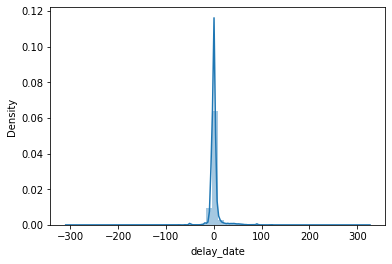

In [43]:
sns.distplot(y_train)

In [44]:
#above graph is bell shape so conclude that no outliers are there

In [45]:
merged =X_train.merge(y_train,on = X_train.index)

In [46]:
merged

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay_date
0,32326,U001,0200762301,C&S WH co,2019-01-15,2019,1.928540e+09,2018-12-30,2018-12-29,2019-01-14,USD,18116.87,2018-12-30,NAC6,1.928540e+09,0,1.0
1,5448,U001,0200769623,WAL-MAR corporation,2019-01-09,2019,1.928541e+09,2018-12-30,2018-12-29,2019-01-14,USD,22801.22,2018-12-30,NAH4,1.928541e+09,0,-5.0
2,10104,U001,0200769623,WAL-MAR,2019-01-09,2019,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,13644.22,2018-12-30,NAH4,1.928543e+09,0,-5.0
3,41979,U001,0200769623,WAL-MAR corp,2019-01-09,2019,1.928541e+09,2018-12-30,2018-12-29,2019-01-14,USD,14548.67,2018-12-30,NAH4,1.928541e+09,0,-5.0
4,20304,U001,0200769623,WAL-MAR foundation,2019-01-09,2019,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,USD,15716.33,2018-12-30,NAH4,1.928542e+09,0,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27363,14399,U013,0140103335,PARAM corporation,2019-11-06,2019,1.991833e+09,2019-10-07,2019-10-03,2019-11-06,USD,690.13,2019-10-07,NAVE,1.991833e+09,0,0.0
27364,36231,U001,0200743129,BROOKS systems,2019-10-28,2019,1.929975e+09,2019-10-07,2019-10-07,2019-10-22,USD,1302.53,2019-10-07,NAA8,1.929975e+09,0,6.0
27365,29369,U001,0200762301,C&S WH,2019-10-22,2019,1.929974e+09,2019-10-07,2019-10-05,2019-11-16,USD,3167.08,2019-10-07,NAWU,1.929974e+09,0,-25.0
27366,6330,U001,0200747369,SCHNU corp,2019-10-21,2019,1.929981e+09,2019-10-07,2019-10-07,2019-10-22,USD,11758.00,2019-10-07,NAA8,1.929981e+09,0,-1.0


<AxesSubplot:xlabel='delay_date', ylabel='total_open_amount'>

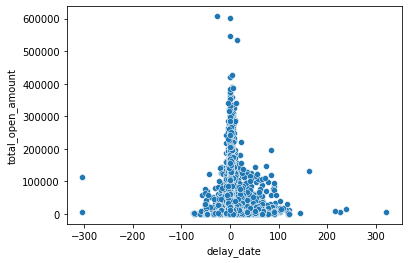

In [47]:

sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="delay_date", y="total_open_amount")

### Feature Engineering

In [48]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27368 entries, 32326 to 16443
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         27368 non-null  object        
 1   cust_number           27368 non-null  object        
 2   name_customer         27368 non-null  object        
 3   clear_date            27368 non-null  datetime64[ns]
 4   buisness_year         27368 non-null  int32         
 5   doc_id                27368 non-null  float64       
 6   posting_date          27368 non-null  object        
 7   document_create_date  27368 non-null  datetime64[ns]
 8   due_in_date           27368 non-null  datetime64[ns]
 9   invoice_currency      27368 non-null  object        
 10  total_open_amount     27368 non-null  float64       
 11  baseline_create_date  27368 non-null  datetime64[ns]
 12  cust_payment_terms    27368 non-null  object        
 13  invoice_id  

In [49]:
def change(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

In [50]:
from sklearn.preprocessing import LabelEncoder
business_encd = LabelEncoder()
business_encd.fit(X_train['business_code'])
X_train['business_encd'] =business_encd.transform(X_train['business_code'])

In [51]:
X_val['business_encd'] = business_encd.transform(X_val['business_code'])
X_test['business_encd'] = business_encd.transform(X_test['business_code'])

In [52]:
X_train ,X_val, X_test = change(['business_code'])

In [53]:
#X_val

In [54]:
name_cust_encd = LabelEncoder()
name_cust_encd.fit(X_train['name_customer'])
X_train['name_cust_encd'] =name_cust_encd.transform(X_train['name_customer'])

In [55]:
name_cust_encd.fit(X_val['name_customer'])
X_val['name_cust_encd'] = name_cust_encd.transform(X_val['name_customer'])
#X_test['name_cust_encd'] = name_cust_encd.transform(X_test['name_customer'])

In [56]:
name_cust_encd.fit(X_test['name_customer'])
X_test['name_cust_encd'] = name_cust_encd.transform(X_test['name_customer'])

In [57]:
X_train ,X_val, X_test = change(['name_customer'])

In [58]:
X_train['day_clear_date'] = X_train['clear_date'].dt.day
X_train['month_clear_date'] = X_train['clear_date'].dt.month
X_train['year_clear_date'] = X_train['clear_date'].dt.year

X_val['day_clear_date'] = X_val['clear_date'].dt.day
X_val['month_clear_date'] = X_val['clear_date'].dt.month
X_val['year_clear_date'] = X_val['clear_date'].dt.year

X_test['day_clear_date'] = X_test['clear_date'].dt.day
X_test['month_clear_date'] = X_test['clear_date'].dt.month
X_test['year_clear_date'] = X_test['clear_date'].dt.year



In [59]:
X_train,X_val,X_test= change(['clear_date'])

In [60]:
X_train['day_document_create_date'] = X_train['document_create_date'].dt.day
X_train['month_document_create_date'] = X_train['document_create_date'].dt.month
X_train['year_documnent_create_date'] = X_train['document_create_date'].dt.year

X_val['day_document_create_date'] = X_val['document_create_date'].dt.day
X_val['month_document_create_date'] = X_val['document_create_date'].dt.month
X_val['year_document_create_date'] = X_val['document_create_date'].dt.year

X_test['day_document_create_date'] = X_test['document_create_date'].dt.day
X_test['month_document_create_date'] = X_test['document_create_date'].dt.month
X_test['year_document_create_date'] = X_test['document_create_date'].dt.year

In [61]:
X_train,X_val,X_test= change(['document_create_date'])

In [62]:
X_train['posting_date']=pd.to_datetime(X_train['posting_date'])
X_val['posting_date']=pd.to_datetime(X_val['posting_date'])
X_test['posting_date']=pd.to_datetime(X_test['posting_date'])

In [63]:
X_train['day_posting_date'] = X_train['posting_date'].dt.day
X_train['month_posting_date'] = X_train['posting_date'].dt.month
X_train['year_posting_date'] = X_train['posting_date'].dt.year

X_val['day_posting_date'] = X_val['posting_date'].dt.day
X_val['month_posting_date'] = X_val['posting_date'].dt.month
X_val['year_posting_date'] = X_val['posting_date'].dt.year

X_test['day_posting_date'] = X_test['posting_date'].dt.day
X_test['month_posting_date'] = X_test['posting_date'].dt.month
X_test['year_posting_date'] = X_test['posting_date'].dt.year

In [64]:
X_train,X_val,X_test= change(['posting_date'])

In [65]:
X_train['day_due_in_date'] = X_train['due_in_date'].dt.day
X_train['month_due_in_date'] = X_train['due_in_date'].dt.month
X_train['year_due_in_date'] = X_train['due_in_date'].dt.year

X_val['day_due_in_date'] = X_val['due_in_date'].dt.day
X_val['month_due_in_date'] = X_val['due_in_date'].dt.month
X_val['year_due_in_date'] = X_val['due_in_date'].dt.year

X_test['day_due_in_date'] = X_test['due_in_date'].dt.day
X_test['month_due_in_date'] = X_test['due_in_date'].dt.month
X_test['year_due_in_date'] = X_test['due_in_date'].dt.year

In [66]:
X_train,X_val,X_test= change(['due_in_date'])

In [67]:
X_train['day_baseline_create_date'] = X_train['baseline_create_date'].dt.day
X_train['month_baseline_create_date'] = X_train['baseline_create_date'].dt.month
X_train['year_baseline_create_date'] = X_train['baseline_create_date'].dt.year

X_val['day_baseline_create_date'] = X_val['baseline_create_date'].dt.day
X_val['month_baseline_create_date'] = X_val['baseline_create_date'].dt.month
X_val['year_baseline_create_date'] = X_val['baseline_create_date'].dt.year

X_test['day_baselie_create_date'] = X_test['baseline_create_date'].dt.day
X_test['month_baseline_create_date'] = X_test['baseline_create_date'].dt.month
X_test['year_baseline_create_date'] = X_test['baseline_create_date'].dt.year

In [68]:
X_train,X_val,X_test= change(['baseline_create_date'])

In [69]:
#X_train[X_train.doc_id!=X_train.invoice_id]
X_train.drop('doc_id',axis=1,inplace=True)
X_val.drop('doc_id',axis=1,inplace=True)
X_test.drop('doc_id',axis=1,inplace=True)

In [70]:
invoice_currency_encd = LabelEncoder()
invoice_currency_encd.fit(X_train['invoice_currency'])
X_train['invoice_currency_encd'] =invoice_currency_encd.transform(X_train['invoice_currency'])

In [71]:
invoice_currency_encd.fit(X_val['invoice_currency'])
X_val['invoice_currency_encd'] =invoice_currency_encd.transform(X_val['invoice_currency'])

In [72]:
invoice_currency_encd.fit(X_test['invoice_currency'])
X_test['invoice_currency_encd'] =invoice_currency_encd.transform(X_test['invoice_currency'])

In [73]:
#X_train.head()

In [74]:
X_train,X_val,X_test= change(['invoice_currency'])

In [75]:
cust_payment_terms_encd= LabelEncoder()
cust_payment_terms_encd.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_encd'] =cust_payment_terms_encd.transform(X_train['cust_payment_terms'])

In [76]:
cust_payment_terms_encd.fit(X_val['cust_payment_terms'])
X_val['cust_payment_terms_encd'] =cust_payment_terms_encd.transform(X_val['cust_payment_terms'])

In [77]:
cust_payment_terms_encd.fit(X_test['cust_payment_terms'])
X_test['cust_payment_terms_encd'] =cust_payment_terms_encd.transform(X_test['cust_payment_terms'])

In [78]:
X_train,X_val,X_test= change(['cust_payment_terms'])

In [79]:
cust_number_encd= LabelEncoder()
cust_number_encd.fit(X_train['cust_number'])
X_train['cust_number_encd'] =cust_number_encd.transform(X_train['cust_number'])

In [80]:
cust_number_encd.fit(X_val['cust_number'])
X_val['cust_number_encd'] =cust_number_encd.transform(X_val['cust_number'])

In [81]:
cust_number_encd.fit(X_test['cust_number'])
X_test['cust_number_encd'] =cust_number_encd.transform(X_test['cust_number'])

In [82]:
X_train,X_val,X_test= change(['cust_number'])

In [83]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27368 entries, 32326 to 16443
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   buisness_year               27368 non-null  int32  
 1   total_open_amount           27368 non-null  float64
 2   invoice_id                  27368 non-null  float64
 3   isOpen                      27368 non-null  int64  
 4   business_encd               27368 non-null  int32  
 5   name_cust_encd              27368 non-null  int32  
 6   day_clear_date              27368 non-null  int64  
 7   month_clear_date            27368 non-null  int64  
 8   year_clear_date             27368 non-null  int64  
 9   day_document_create_date    27368 non-null  int64  
 10  month_document_create_date  27368 non-null  int64  
 11  year_documnent_create_date  27368 non-null  int64  
 12  day_posting_date            27368 non-null  int64  
 13  month_posting_date         

In [84]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5865 entries, 28339 to 7484
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   buisness_year               5865 non-null   int32  
 1   total_open_amount           5865 non-null   float64
 2   invoice_id                  5865 non-null   float64
 3   isOpen                      5865 non-null   int64  
 4   business_encd               5865 non-null   int32  
 5   name_cust_encd              5865 non-null   int32  
 6   day_clear_date              5865 non-null   int64  
 7   month_clear_date            5865 non-null   int64  
 8   year_clear_date             5865 non-null   int64  
 9   day_document_create_date    5865 non-null   int64  
 10  month_document_create_date  5865 non-null   int64  
 11  year_document_create_date   5865 non-null   int64  
 12  day_posting_date            5865 non-null   int64  
 13  month_posting_date          5

In [85]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5865 entries, 43220 to 15842
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   buisness_year               5865 non-null   int32  
 1   total_open_amount           5865 non-null   float64
 2   invoice_id                  5865 non-null   float64
 3   isOpen                      5865 non-null   int64  
 4   business_encd               5865 non-null   int32  
 5   name_cust_encd              5865 non-null   int32  
 6   day_clear_date              5865 non-null   int64  
 7   month_clear_date            5865 non-null   int64  
 8   year_clear_date             5865 non-null   int64  
 9   day_document_create_date    5865 non-null   int64  
 10  month_document_create_date  5865 non-null   int64  
 11  year_document_create_date   5865 non-null   int64  
 12  day_posting_date            5865 non-null   int64  
 13  month_posting_date          

# FEATURE SELECTION

<AxesSubplot:title={'center':'Correlation matrix'}>

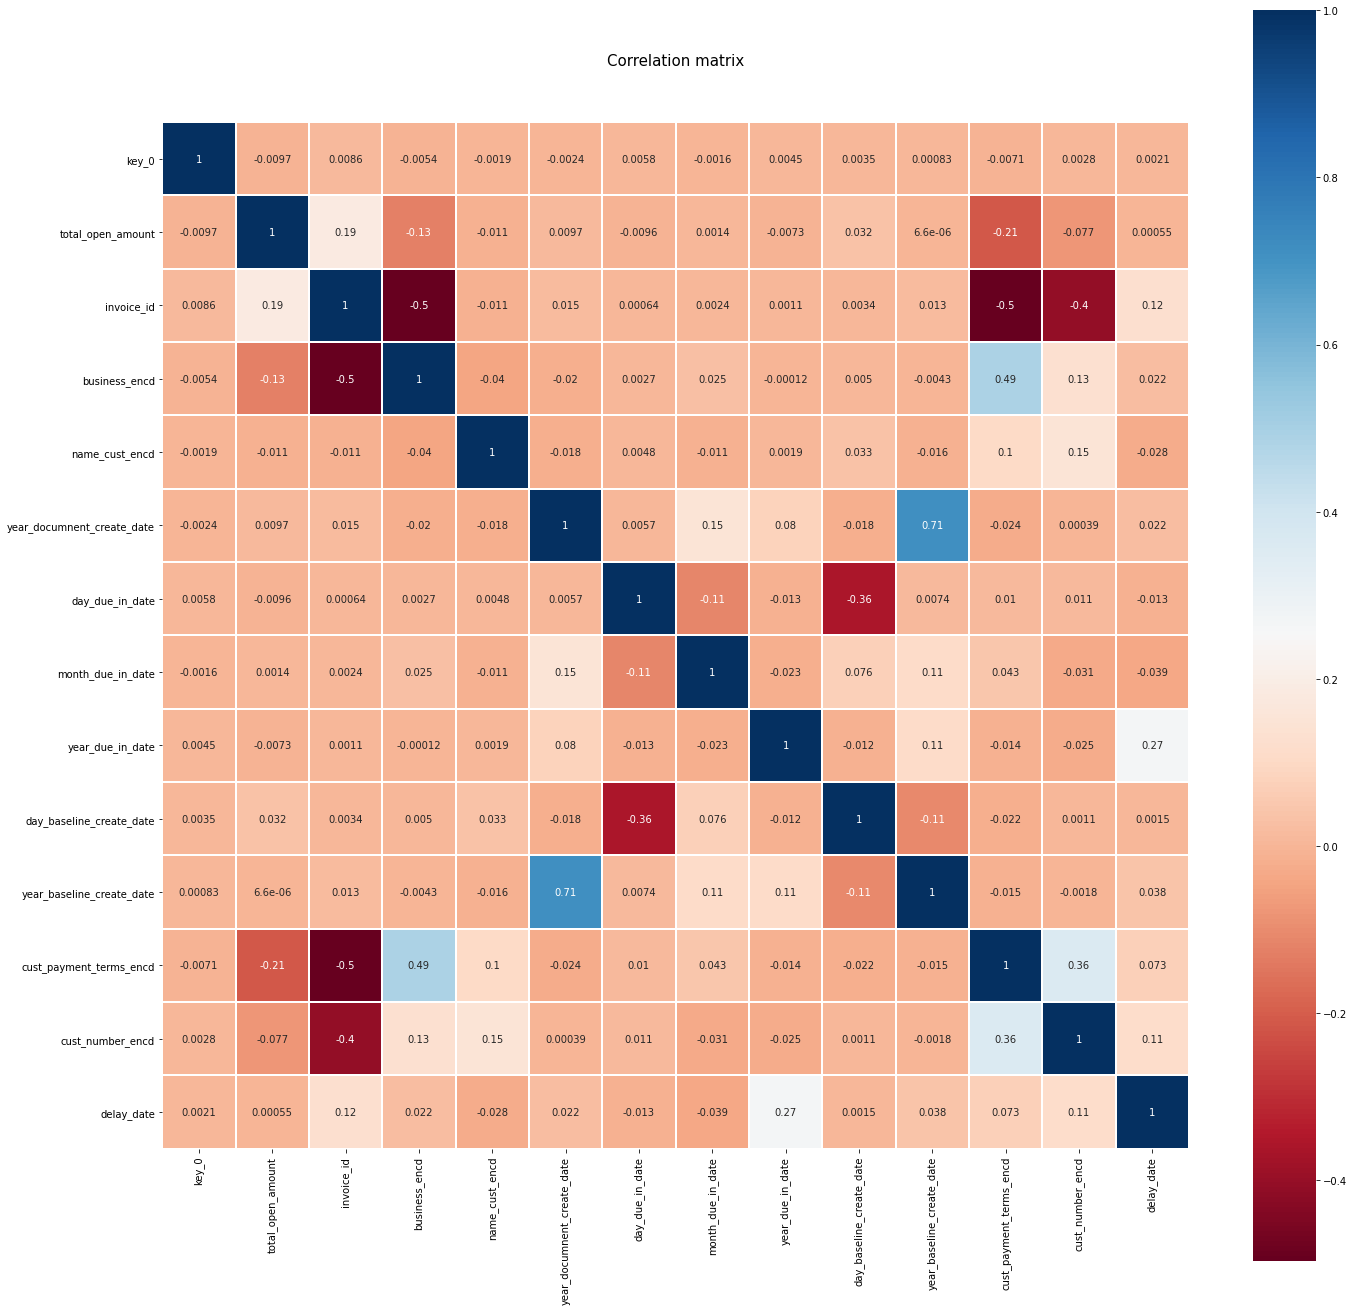

In [98]:
colormap = plt.cm.RdBu
plt.figure(figsize=(23,23))
plt.title('Correlation matrix', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [87]:
X_train,X_val,X_test= change(['buisness_year','isOpen','year_clear_date'])

In [88]:
#invoice_id and invoice_currency_encd have a high relation of -1
X_train,X_val,X_test= change(['invoice_currency_encd'])

In [89]:
#month_documnet_create_date(0.9),month_posting_date(0.93),month_due_in_date(0.98),month_baseline_create_date(0.93)with month_clear_date
X_train,X_val,X_test= change(['month_clear_date'])

In [90]:
#day-documnet_date(0.82) with day_posting_date
X_train,X_val,X_test= change(['day_document_create_date'])

In [91]:
#month_document_create_date having correlatioon with month_posting_date,(0.9)month_due_in_date,month_baseline_create_date(0.97)
X_train,X_val,X_test= change(['month_document_create_date'])

In [92]:
#day_posting_date have a correlation of 0.95 with day_baseline_create_date
X_train,X_val,X_test= change(['day_posting_date'])

In [93]:
#month_posting_date havin correlatiopn of0.93 and 1 with monthdue_in_date and minth_baseline_create_date
X_train,X_val,X_test= change(['month_posting_date'])

In [94]:
#year_posting_date and year_posting_date(0.98)
X_train,X_val,X_test= change(['year_posting_date'])

In [95]:
#year_baseline_create_date (0.94)with month_due_in_date
X_train,X_val,X_test= change(['month_baseline_create_date'])

In [96]:
X_train,X_val,X_test= change(['day_clear_date'])

In [97]:
#X_train,X_val,X_test= change(['year_baseline_create_date'])

# BASE MODELLING

In [99]:

from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train, y_train)

LinearRegression()

In [100]:
y_predict = base_model.predict(X_val)

In [101]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, y_predict, squared=False)

8.02449819067754

In [102]:
y_predict_test_base = base_model.predict(X_test)
mean_squared_error(y_test, y_predict_test_base, squared=False)

295.1131895424371

# TREE BASED MODEL

In [103]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=2)

In [104]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=0)

In [105]:
y_predict2 = regressor.predict(X_val)

In [106]:
mean_squared_error(y_val, y_predict2, squared=False)


19.30597179004325

In [107]:
np.sqrt(mean_squared_error(y_val, y_predict2, squared=False))

4.393856141254883

In [108]:
y_predict_test = regressor.predict(X_test)
mean_squared_error(y_test, y_predict_test, squared=False)

57.95343128792236

In [109]:
np.sqrt(mean_squared_error(y_test, y_predict_test, squared=False))

7.6127151061840195

# Random Forest

In [110]:
from sklearn.ensemble import RandomForestRegressor

In [111]:
clf_R = RandomForestRegressor(random_state=0)
clf_R.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [112]:
y_predicted3 = clf_R.predict(X_val)

In [113]:

mean_squared_error(y_val, y_predicted3,squared=False)

14.201646502288355

In [114]:
np.sqrt(mean_squared_error(y_val, y_predicted3, squared=False))

3.7685071981208096

In [115]:
from sklearn.metrics import r2_score
r2_score(y_val,y_predicted3)

0.45892633937720906

In [116]:
#X_train

In [117]:
y_predict_test1 = regressor.predict(X_test)
mean_squared_error(y_test, y_predict_test1, squared=False)

57.95343128792236

In [118]:
np.sqrt(mean_squared_error(y_test, y_predict_test1, squared=False))

7.6127151061840195

# TRAINING TEST DATASET

In [119]:
# PREPROCESSING IN TRAINING TEST DATASET

In [120]:
test.isna().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9715
buisness_year              0
doc_id                     0
posting_date               0
document_create_date       0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
invoice_id                 0
isOpen                     0
delay_date              9715
dtype: int64

In [121]:
test['posting_date']=pd.to_datetime(test['posting_date'])

In [122]:
test.drop('doc_id',axis=1,inplace=True)
#doc_id and invoice_id are same

In [123]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9715 entries, 8762 to 27297
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         9715 non-null   object        
 1   cust_number           9715 non-null   object        
 2   name_customer         9715 non-null   object        
 3   clear_date            0 non-null      datetime64[ns]
 4   buisness_year         9715 non-null   int32         
 5   posting_date          9715 non-null   datetime64[ns]
 6   document_create_date  9715 non-null   datetime64[ns]
 7   due_in_date           9715 non-null   datetime64[ns]
 8   invoice_currency      9715 non-null   object        
 9   total_open_amount     9715 non-null   float64       
 10  baseline_create_date  9715 non-null   datetime64[ns]
 11  cust_payment_terms    9715 non-null   object        
 12  invoice_id            9715 non-null   float64       
 13  isOpen        

In [124]:
X_real_test = test.drop(['delay_date','clear_date'],axis=1)
X_real_test

,business_code,cust_number,name_customer,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
8762,U001,0200761734,H E BUT,2020,2020-02-27,2020-02-26,2020-03-13,USD,43708.67,2020-02-27,NAA8,1.930573e+09,1
49683,U001,0200761734,H E BUT corp,2020,2020-02-27,2020-02-26,2020-03-13,USD,126482.88,2020-02-27,NAA8,1.930571e+09,1
8712,U001,0200769623,WAL-MAR foundation,2020,2020-02-27,2020-02-26,2020-03-13,USD,2373.96,2020-02-27,NAH4,1.930571e+09,1
47979,U001,0200744019,TARG co,2020,2020-02-27,2020-02-26,2020-03-13,USD,46740.70,2020-02-27,NAA8,1.930570e+09,1
12627,U001,0200769623,WAL-MAR associates,2020,2020-02-27,2020-02-25,2020-03-13,USD,78535.22,2020-02-27,NAH4,1.930566e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14044,U001,200915438,GROC trust,2020,2020-05-14,2020-05-07,2020-05-29,USD,6000.00,2020-05-14,NAA8,1.930876e+09,1
3357,CA02,0140104392,FLANAG us,2020,2020-05-14,2020-05-14,2020-05-24,CAD,3750.83,2020-05-14,CA10,2.960635e+09,1
49002,U001,0100036318,TFC llc,2020,2020-05-14,2020-05-14,2020-05-24,USD,4025.00,2020-05-14,NA10,1.930902e+09,1
24601,U001,200875680,MINERS,2020,2020-05-18,2020-05-16,2020-06-02,USD,119248.83,2020-05-18,NAA8,1.930911e+09,1


# Feature Engineering 

In [125]:
X_real_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9715 entries, 8762 to 27297
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         9715 non-null   object        
 1   cust_number           9715 non-null   object        
 2   name_customer         9715 non-null   object        
 3   buisness_year         9715 non-null   int32         
 4   posting_date          9715 non-null   datetime64[ns]
 5   document_create_date  9715 non-null   datetime64[ns]
 6   due_in_date           9715 non-null   datetime64[ns]
 7   invoice_currency      9715 non-null   object        
 8   total_open_amount     9715 non-null   float64       
 9   baseline_create_date  9715 non-null   datetime64[ns]
 10  cust_payment_terms    9715 non-null   object        
 11  invoice_id            9715 non-null   float64       
 12  isOpen                9715 non-null   int64         
dtypes: datetime64[

In [126]:
business_encd = LabelEncoder()
business_encd.fit(X_real_test['business_code'])
X_real_test['business_encd'] =business_encd.transform(X_real_test['business_code'])

In [127]:
X_real_test.drop('business_code',axis=1,inplace=True)

In [128]:
cust_number_encd= LabelEncoder()
cust_number_encd.fit(X_real_test['cust_number'])
X_real_test['cust_number_encd'] =cust_number_encd.transform(X_real_test['cust_number'])

In [129]:
X_real_test.drop('cust_number',axis=1,inplace=True)

In [130]:
name_cust_encd = LabelEncoder()
name_cust_encd.fit(X_real_test['name_customer'])
X_real_test['name_cust_encd'] =name_cust_encd.transform(X_real_test['name_customer'])

In [131]:
X_real_test.drop('name_customer',axis=1,inplace=True)

In [132]:
invoice_currency_encd = LabelEncoder()
invoice_currency_encd.fit(X_real_test['invoice_currency'])
X_real_test['invoice_currency_encd'] =invoice_currency_encd.transform(X_real_test['invoice_currency'])

In [133]:
X_real_test.drop('invoice_currency',axis=1,inplace=True)

In [134]:
cust_payment_terms_encd= LabelEncoder()
cust_payment_terms_encd.fit(X_real_test['cust_payment_terms'])
X_real_test['cust_payment_terms_encd'] =cust_payment_terms_encd.transform(X_real_test['cust_payment_terms'])

In [135]:
X_real_test.drop('cust_payment_terms',axis=1,inplace=True)

In [136]:
X_real_test['day_posting_date'] = X_real_test['posting_date'].dt.day
X_real_test['month_posting_date'] = X_real_test['posting_date'].dt.month
X_real_test['year_posting_date'] = X_real_test['posting_date'].dt.year

In [137]:
X_real_test.drop('posting_date',axis=1,inplace=True)

In [138]:
X_real_test['day_document_create_date'] = X_real_test['document_create_date'].dt.day
X_real_test['month_document_create_date'] = X_real_test['document_create_date'].dt.month
X_real_test['year_documnent_create_date'] = X_real_test['document_create_date'].dt.year

In [139]:
X_real_test.drop('document_create_date',axis=1,inplace=True)

In [140]:
X_real_test['day_due_in_date'] = X_real_test['due_in_date'].dt.day
X_real_test['month_due_in_date'] = X_real_test['due_in_date'].dt.month
X_real_test['year_due_in_date'] = X_real_test['due_in_date'].dt.year

In [141]:
X_real_test['day_baseline_create_date'] = X_real_test['baseline_create_date'].dt.day
X_real_test['month_baseline_create_date'] = X_real_test['baseline_create_date'].dt.month
X_real_test['year_baseline_create_date'] = X_real_test['baseline_create_date'].dt.year


In [142]:
X_real_test.drop(['baseline_create_date','due_in_date'],axis=1,inplace=True)

In [143]:
X_real_test.columns

Index(['buisness_year', 'total_open_amount', 'invoice_id', 'isOpen',
       'business_encd', 'cust_number_encd', 'name_cust_encd',
       'invoice_currency_encd', 'cust_payment_terms_encd', 'day_posting_date',
       'month_posting_date', 'year_posting_date', 'day_document_create_date',
       'month_document_create_date', 'year_documnent_create_date',
       'day_due_in_date', 'month_due_in_date', 'year_due_in_date',
       'day_baseline_create_date', 'month_baseline_create_date',
       'year_baseline_create_date'],
      dtype='object')

In [144]:
X_train.columns

Index(['total_open_amount', 'invoice_id', 'business_encd', 'name_cust_encd',
       'year_documnent_create_date', 'day_due_in_date', 'month_due_in_date',
       'year_due_in_date', 'day_baseline_create_date',
       'year_baseline_create_date', 'cust_payment_terms_encd',
       'cust_number_encd'],
      dtype='object')

In [145]:
X_real_test.drop(['buisness_year','isOpen','day_posting_date','month_posting_date','year_posting_date','month_baseline_create_date','day_document_create_date','month_document_create_date','day_document_create_date','month_document_create_date','invoice_currency_encd'],axis=1,inplace=True)

In [146]:
#X_real_test.drop('year_baseline_create_date',axis=1,inplace=True)

In [147]:
#X_train.drop('day_clear_date',axis=1,inplace=True)

In [148]:
#X_val.drop('day_clear_date',axis=1,inplace=True)

In [149]:
#X_test.drop('day_clear_date',axis=1,inplace=True)

In [150]:
test.drop(['delay_date'], inplace =True,axis=1)

In [151]:
test.drop(['clear_date'],inplace=True,axis=1)

### Ending the whole game :)

In [152]:

final_result = clf_R.predict(X_real_test)

In [153]:
final_result = pd.Series(final_result,name='delay_date')

In [154]:
test.reset_index(drop=True,inplace=True)

In [155]:
Final = test.merge(final_result , on = X_real_test.index )
Final

,key_0,business_code,cust_number,name_customer,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay_date
0,8762,U001,0200761734,H E BUT,2020,2020-02-27,2020-02-26,2020-03-13,USD,43708.67,2020-02-27,NAA8,1.930573e+09,1,31.13
1,49683,U001,0200761734,H E BUT corp,2020,2020-02-27,2020-02-26,2020-03-13,USD,126482.88,2020-02-27,NAA8,1.930571e+09,1,31.58
2,8712,U001,0200769623,WAL-MAR foundation,2020,2020-02-27,2020-02-26,2020-03-13,USD,2373.96,2020-02-27,NAH4,1.930571e+09,1,36.66
3,47979,U001,0200744019,TARG co,2020,2020-02-27,2020-02-26,2020-03-13,USD,46740.70,2020-02-27,NAA8,1.930570e+09,1,30.25
4,12627,U001,0200769623,WAL-MAR associates,2020,2020-02-27,2020-02-25,2020-03-13,USD,78535.22,2020-02-27,NAH4,1.930566e+09,1,34.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9710,14044,U001,200915438,GROC trust,2020,2020-05-14,2020-05-07,2020-05-29,USD,6000.00,2020-05-14,NAA8,1.930876e+09,1,6.33
9711,3357,CA02,0140104392,FLANAG us,2020,2020-05-14,2020-05-14,2020-05-24,CAD,3750.83,2020-05-14,CA10,2.960635e+09,1,36.10
9712,49002,U001,0100036318,TFC llc,2020,2020-05-14,2020-05-14,2020-05-24,USD,4025.00,2020-05-14,NA10,1.930902e+09,1,5.48
9713,24601,U001,200875680,MINERS,2020,2020-05-18,2020-05-16,2020-06-02,USD,119248.83,2020-05-18,NAA8,1.930911e+09,1,6.11


In [156]:
#Final.drop('delay_date_x',axis=1,inplace=True)

In [166]:
Final

,key_0,business_code,cust_number,name_customer,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay_date,clear_date,bucket
0,8762,U001,0200761734,H E BUT,2020,2020-02-27,2020-02-26,2020-03-13,USD,43708.67,2020-02-27,NAA8,1.930573e+09,1,31,2020-04-13,payment is late
1,49683,U001,0200761734,H E BUT corp,2020,2020-02-27,2020-02-26,2020-03-13,USD,126482.88,2020-02-27,NAA8,1.930571e+09,1,31,2020-04-13,payment is late
2,8712,U001,0200769623,WAL-MAR foundation,2020,2020-02-27,2020-02-26,2020-03-13,USD,2373.96,2020-02-27,NAH4,1.930571e+09,1,36,2020-04-18,payment is late
3,47979,U001,0200744019,TARG co,2020,2020-02-27,2020-02-26,2020-03-13,USD,46740.70,2020-02-27,NAA8,1.930570e+09,1,30,2020-04-12,payment is late
4,12627,U001,0200769623,WAL-MAR associates,2020,2020-02-27,2020-02-25,2020-03-13,USD,78535.22,2020-02-27,NAH4,1.930566e+09,1,34,2020-04-16,payment is late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9710,14044,U001,200915438,GROC trust,2020,2020-05-14,2020-05-07,2020-05-29,USD,6000.00,2020-05-14,NAA8,1.930876e+09,1,6,2020-06-04,payment within 10 days
9711,3357,CA02,0140104392,FLANAG us,2020,2020-05-14,2020-05-14,2020-05-24,CAD,3750.83,2020-05-14,CA10,2.960635e+09,1,36,2020-06-29,payment is late
9712,49002,U001,0100036318,TFC llc,2020,2020-05-14,2020-05-14,2020-05-24,USD,4025.00,2020-05-14,NA10,1.930902e+09,1,5,2020-05-29,payment within 5 dayes
9713,24601,U001,200875680,MINERS,2020,2020-05-18,2020-05-16,2020-06-02,USD,119248.83,2020-05-18,NAA8,1.930911e+09,1,6,2020-06-08,payment within 10 days


In [158]:
#Final_dup['delay_date']=Final_dup['delay_date'].astype(int)

In [159]:
Final['delay_date']=Final['delay_date'].astype(int)

In [160]:
from datetime import datetime,timedelta

In [161]:
Final['clear_date'] = Final['due_in_date'] + pd.to_timedelta(Final['delay_date'], unit='d')
#Final_dup.head()

In [162]:
#Final.drop('new',axis=1,inplace=True)

In [163]:
def bucket(x):
       
    if(x<=0):
        return 'no delay in payment'
    elif(x>0 and x<=5):
        return 'payment within 5 dayes'
      
    elif(x>0 and x<=10):
        return 'payment within 10 days'
    else:
        return 'payment is late'
Final['bucket']=Final.delay_date.apply(bucket)

In [164]:
Final.to_csv('finalm.csv')

In [165]:
Final.invoice_id.nunique()

9715